In [206]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'dataset/table_AIH_2009_2024_SUBGRUPO_PROC.csv', sep=';', usecols=['ano',
                                                                                     'mes',
                                                                                     'Faixa_Populacao',
                                                                                     #'Faixa_Populacao_FPM',
                                                                                     'LATITUDE',
                                                                                     'LONGITUDE',
                                                                                     'Municipio_Capital',
                                                                                     'Nome_Municipio',
                                                                                     'Numero_Habitantes_Censo_2022',
                                                                                     'qtd_0310',
                                                                                     'VL_0310',
                                                                                     'qtd_0411',
                                                                                     'VL_0411',
                                                                                     'qtd_0205',
                                                                                     'VL_0205',
                                                                                     'Regiao_Codigo',
                                                                                     'Regiao_Nome',
                                                                                     'UF',
                                                                                     'UF_Codigo',
                                                                                     'UF_Nome'])

In [3]:
df.head()

,ano,mes,Nome_Municipio,Regiao_Codigo,Regiao_Nome,UF_Codigo,UF,UF_Nome,Municipio_Capital,Numero_Habitantes_Censo_2022,Faixa_Populacao,qtd_0205,qtd_0310,qtd_0411,VL_0205,VL_0310,VL_0411,LONGITUDE,LATITUDE
0,2009,1,Alta Floresta D'Oeste,1,Norte,11,RO,Rondônia,Nã,21495,03 - De 20.001 a 50.000 habitantes,2,7,2,"48,4","3103,8","1091,46","-61,999824","-11,935540"
1,2009,1,Ariquemes,1,Norte,11,RO,Rondônia,Nã,96833,04 - De 50.001 a 100.000 habitantes,7,77,63,"196,9","34141,8","27791,01","-63,033269","-9,908463"
2,2009,1,Cabixi,1,Norte,11,RO,Rondônia,Nã,5363,01 - Até 10.000 habitantes,.,10,.,.,4434,.,"-60,544314","-13,499763"
3,2009,1,Cacoal,1,Norte,11,RO,Rondônia,Nã,86895,04 - De 50.001 a 100.000 habitantes,.,67,19,.,"34338,92","10002,76","-61,442944","-11,433865"
4,2009,1,Cerejeiras,1,Norte,11,RO,Rondônia,Nã,15890,02 - De 10.001 a 20.000 habitantes,.,13,7,.,"5606,33","3003,92","-60,818426","-13,195033"


In [4]:
dicionario = {'Nome_Municipio': 'municipio',
              'Regiao_Codigo': 'regiao_codigo',
              'Regiao_Nome': 'regiao_nome',
              'UF_Codigo': 'uf_codigo',
              'UF': 'uf',
              'UF_Nome': 'uf_nome',
              'Municipio_Capital': 'capital',
              'Numero_Habitantes_Censo_2022': 'numero_habitantes',
              'Faixa_Populacao': 'populacao_faixa',
              #'Faixa_Populacao_FPM': 'populacao_faixa_fpm',
              'qtd_0205': 'diagnostico_ultrasonografia_qtd',
              'VL_0205': 'diagnostico_ultrasonografia_val',
              'qtd_0411': 'cirurgias_obstetricas_qtd',
              'VL_0411': 'cirurgias_obstetricas_val',
              'qtd_0310': 'partos_e_nascimentos_qtd',
              'VL_0310': 'partos_e_nascimentos_val',
              'LATITUDE': 'latitude',
              'LONGITUDE': 'longitude'}

In [5]:
df.rename(columns=dicionario, inplace=True)

In [6]:
def get_mes(mes_cod):
    mes = {1: 'Jan',
           2: 'Fev',
           3: 'Mar',
           4: 'Abr',
           5: 'Mai',
           6: 'Jun',
           7: 'Jul',
           8: 'Ago',
           9: 'Set',
           10: 'Out',
           11: 'Nov',
           12: 'Dez'}
    return mes.get(mes_cod, 'Cod. Inválido')

In [7]:
df['mes'] = list(map(lambda x: get_mes(x), df['mes']))

In [8]:
df.columns

Index(['ano', 'mes', 'municipio', 'regiao_codigo', 'regiao_nome', 'uf_codigo',
       'uf', 'uf_nome', 'capital', 'numero_habitantes', 'populacao_faixa',
       'diagnostico_ultrasonografia_qtd', 'partos_e_nascimentos_qtd',
       'cirurgias_obstetricas_qtd', 'diagnostico_ultrasonografia_val',
       'partos_e_nascimentos_val', 'cirurgias_obstetricas_val', 'longitude',
       'latitude'],
      dtype='object')

In [9]:
df[['mes', 'ano', 'municipio', 'partos_e_nascimentos_qtd', 'cirurgias_obstetricas_qtd', 'diagnostico_ultrasonografia_qtd']]

,mes,ano,municipio,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,diagnostico_ultrasonografia_qtd
0,Jan,2009,Alta Floresta D'Oeste,7,2,2
1,Jan,2009,Ariquemes,77,63,7
2,Jan,2009,Cabixi,10,.,.
3,Jan,2009,Cacoal,67,19,.
4,Jan,2009,Cerejeiras,13,7,.
...,...,...,...,...,...,...
1013735,Fev,2024,Vianópolis,.,.,.
1013736,Fev,2024,Vicentinópolis,.,.,.
1013737,Fev,2024,Vila Boa,.,.,.
1013738,Fev,2024,Vila Propício,.,.,.


In [10]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [11]:
df['partos_e_nascimentos_qtd'] = df['partos_e_nascimentos_qtd'].replace('.', np.nan)

In [12]:
df['diagnostico_ultrasonografia_qtd'] = df['diagnostico_ultrasonografia_qtd'].replace('.', np.nan)

In [13]:
df['cirurgias_obstetricas_qtd'] = df['cirurgias_obstetricas_qtd'].replace('.', np.nan)

In [14]:
df['cirurgias_obstetricas_val'] = df['cirurgias_obstetricas_val'].replace('.', np.nan)

In [15]:
df['partos_e_nascimentos_val'] = df['partos_e_nascimentos_val'].replace('.', np.nan)

In [16]:
df['diagnostico_ultrasonografia_val'] = df['diagnostico_ultrasonografia_val'].replace('.', np.nan)

In [17]:
df.filter(regex='_qtd|_val')

,diagnostico_ultrasonografia_qtd,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,diagnostico_ultrasonografia_val,partos_e_nascimentos_val,cirurgias_obstetricas_val
0,2,7,2,"48,4","3103,8","1091,46"
1,7,77,63,"196,9","34141,8","27791,01"
2,NaN,10,NaN,NaN,4434,NaN
3,NaN,67,19,NaN,"34338,92","10002,76"
4,NaN,13,7,NaN,"5606,33","3003,92"
...,...,...,...,...,...,...
1013735,NaN,NaN,NaN,NaN,NaN,NaN
1013736,NaN,NaN,NaN,NaN,NaN,NaN
1013737,NaN,NaN,NaN,NaN,NaN,NaN
1013738,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.head()

,ano,mes,municipio,regiao_codigo,regiao_nome,uf_codigo,uf,uf_nome,capital,numero_habitantes,populacao_faixa,diagnostico_ultrasonografia_qtd,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,diagnostico_ultrasonografia_val,partos_e_nascimentos_val,cirurgias_obstetricas_val,longitude,latitude
0,2009,Jan,Alta Floresta D'Oeste,1,Norte,11,RO,Rondônia,Nã,21495,03 - De 20.001 a 50.000 habitantes,2,7,2,"48,4","3103,8","1091,46","-61,999824","-11,935540"
1,2009,Jan,Ariquemes,1,Norte,11,RO,Rondônia,Nã,96833,04 - De 50.001 a 100.000 habitantes,7,77,63,"196,9","34141,8","27791,01","-63,033269","-9,908463"
2,2009,Jan,Cabixi,1,Norte,11,RO,Rondônia,Nã,5363,01 - Até 10.000 habitantes,NaN,10,NaN,NaN,4434,NaN,"-60,544314","-13,499763"
3,2009,Jan,Cacoal,1,Norte,11,RO,Rondônia,Nã,86895,04 - De 50.001 a 100.000 habitantes,NaN,67,19,NaN,"34338,92","10002,76","-61,442944","-11,433865"
4,2009,Jan,Cerejeiras,1,Norte,11,RO,Rondônia,Nã,15890,02 - De 10.001 a 20.000 habitantes,NaN,13,7,NaN,"5606,33","3003,92","-60,818426","-13,195033"


In [19]:
df.dtypes

ano                                 int64
mes                                object
municipio                          object
regiao_codigo                       int64
regiao_nome                        object
uf_codigo                           int64
uf                                 object
uf_nome                            object
capital                            object
numero_habitantes                   int64
populacao_faixa                    object
diagnostico_ultrasonografia_qtd    object
partos_e_nascimentos_qtd           object
cirurgias_obstetricas_qtd          object
diagnostico_ultrasonografia_val    object
partos_e_nascimentos_val           object
cirurgias_obstetricas_val          object
longitude                          object
latitude                           object
dtype: object

In [20]:
df['diagnostico_ultrasonografia_val'] = df['diagnostico_ultrasonografia_val'].str.replace(',', '.')

In [21]:
df['partos_e_nascimentos_val'] = df['partos_e_nascimentos_val'].str.replace(',', '.')

In [22]:
df['cirurgias_obstetricas_val'] = df['cirurgias_obstetricas_val'].str.replace(',', '.')

In [23]:
df['longitude'] = df['longitude'].str.replace(',', '.')

In [24]:
df['latitude'] = df['latitude'].str.replace(',', '.')

In [28]:
df.head(100)

,ano,mes,municipio,regiao_codigo,regiao_nome,uf_codigo,uf,uf_nome,capital,numero_habitantes,populacao_faixa,diagnostico_ultrasonografia_qtd,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,diagnostico_ultrasonografia_val,partos_e_nascimentos_val,cirurgias_obstetricas_val,longitude,latitude
0,2009,Jan,Alta Floresta D'Oeste,1,Norte,11,RO,Rondônia,Não,21495,03 - De 20.001 a 50.000 habitantes,2,7,2,48.4,3103.8,1091.46,-61.999824,-11.935540
1,2009,Jan,Ariquemes,1,Norte,11,RO,Rondônia,Não,96833,04 - De 50.001 a 100.000 habitantes,7,77,63,196.9,34141.8,27791.01,-63.033269,-9.908463
2,2009,Jan,Cabixi,1,Norte,11,RO,Rondônia,Não,5363,01 - Até 10.000 habitantes,NaN,10,NaN,NaN,4434,NaN,-60.544314,-13.499763
3,2009,Jan,Cacoal,1,Norte,11,RO,Rondônia,Não,86895,04 - De 50.001 a 100.000 habitantes,NaN,67,19,NaN,34338.92,10002.76,-61.442944,-11.433865
4,2009,Jan,Cerejeiras,1,Norte,11,RO,Rondônia,Não,15890,02 - De 10.001 a 20.000 habitantes,NaN,13,7,NaN,5606.33,3003.92,-60.818426,-13.195033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2009,Jan,Eirunepé,1,Norte,13,AM,Amazonas,Não,33170,03 - De 20.001 a 50.000 habitantes,NaN,57,8,NaN,25273.8,4365.84,-69.866290,-6.667353
96,2009,Jan,Envira,1,Norte,13,AM,Amazonas,Não,17186,02 - De 10.001 a 20.000 habitantes,NaN,NaN,NaN,NaN,NaN,NaN,-70.030413,-7.439818
97,2009,Jan,Fonte Boa,1,Norte,13,AM,Amazonas,Não,25871,03 - De 20.001 a 50.000 habitantes,NaN,39,12,NaN,17292.6,6548.76,-66.096503,-2.512271
98,2009,Jan,Guajará,1,Norte,13,AM,Amazonas,Não,13815,02 - De 10.001 a 20.000 habitantes,NaN,10,NaN,NaN,4434,NaN,-72.582431,-7.547774


In [26]:
df['capital'] = df['capital'].apply(lambda x: x if x == 'Sim' else 'Não')

In [27]:
df.dtypes

ano                                 int64
mes                                object
municipio                          object
regiao_codigo                       int64
regiao_nome                        object
uf_codigo                           int64
uf                                 object
uf_nome                            object
capital                            object
numero_habitantes                   int64
populacao_faixa                    object
diagnostico_ultrasonografia_qtd    object
partos_e_nascimentos_qtd           object
cirurgias_obstetricas_qtd          object
diagnostico_ultrasonografia_val    object
partos_e_nascimentos_val           object
cirurgias_obstetricas_val          object
longitude                          object
latitude                           object
dtype: object

In [29]:
df['mes'] = df['mes'].astype('category')

In [30]:
df['municipio'] = df['municipio'].astype('category')

In [31]:
df['regiao_codigo'] = df['regiao_codigo'].astype('category')

In [32]:
df['regiao_nome'] = df['regiao_nome'].astype('category')

In [33]:
df['capital'] = df['capital'].astype('category')

In [34]:
df['uf'] = df['uf'].astype('category')

In [35]:
df['uf_nome'] = df['uf_nome'].astype('category')

In [36]:
df['uf_codigo'] = df['uf_codigo'].astype('category')

In [37]:
df['populacao_faixa'] = df['populacao_faixa'].astype('category')

In [38]:
for col in df.filter(regex='_qtd'):
    df[col] = df[col].astype('Int64')

In [39]:
for col in df.filter(regex='_val'):
    df[col] = df[col].astype('float64')

In [40]:
df['latitude'] = df['latitude'].astype('float64')

In [41]:
df['longitude'] = df['longitude'].astype('float64')

In [42]:
memoria_por_coluna = df.memory_usage(deep=True)

In [43]:
memoria_total_bytes = memoria_por_coluna.sum()
memoria_total_gb = memoria_total_bytes / (1024**3)
print(f"Uso de memória total: {memoria_total_gb:.6f} GB")

Uso de memória total: 0.088358 GB


In [44]:
# df.to_csv(r'dataset/dataset.csv', index=False)

In [45]:
df.describe()

,ano,numero_habitantes,diagnostico_ultrasonografia_qtd,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,diagnostico_ultrasonografia_val,partos_e_nascimentos_val,cirurgias_obstetricas_val,longitude,latitude
count,1.013740e+06,1.013740e+06,188301.0,407231.0,320742.0,188293.000000,4.152620e+05,3.207450e+05,1.013740e+06,1.013740e+06
mean,2.016088e+03,3.645647e+04,149.800171,40.600011,47.669638,5881.996949,2.228984e+04,2.537859e+04,-4.623172e+01,-1.645072e+01
std,4.376885e+00,2.064986e+05,626.618988,163.028374,145.000453,26389.692027,9.488561e+04,8.241715e+04,6.408195e+00,8.284251e+00
min,2.009000e+03,8.330000e+02,1.0,1.0,1.0,24.200000,5.520000e+01,4.760000e+01,-7.291650e+01,-3.368757e+01
25%,2.012000e+03,5.228000e+03,6.0,4.0,6.0,189.750000,1.773600e+03,2.728650e+03,-5.087195e+01,-2.284286e+01
50%,2.016000e+03,1.106500e+04,23.0,10.0,15.0,721.600000,4.877400e+03,7.442650e+03,-4.652517e+01,-1.809430e+01
75%,2.020000e+03,2.442800e+04,82.0,30.0,42.0,2744.500000,1.463220e+04,2.033226e+04,-4.140958e+01,-8.489593e+00
max,2.024000e+03,1.145124e+07,17275.0,6514.0,4211.0,872883.650000,3.814773e+06,2.401956e+06,-3.243519e+01,4.585440e+00


In [46]:
# analisar as colunas mais relevantes

In [81]:
df = pd.read_csv(r'dataset/table_AIH_2009_2024_CLEAN.csv', sep=';')

In [61]:
df.groupby(['mes','ano'], observed=False).agg({'partos_e_nascimentos_qtd': 'sum'}).reset_index()

,mes,ano,partos_e_nascimentos_qtd
0,1,2009,105424.0
1,1,2010,103943.0
2,1,2011,98951.0
3,1,2012,92914.0
4,1,2013,94223.0
...,...,...,...
177,12,2019,80365.0
178,12,2020,75730.0
179,12,2021,78142.0
180,12,2022,75175.0


In [82]:
df.head()

,ano,mes,municipio,regiao_codigo,regiao_nome,uf_codigo,uf,uf_nome,capital,numero_habitantes,populacao_faixa,diagnostico_ultrasonografia_qtd,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,diagnostico_ultrasonografia_val,partos_e_nascimentos_val,cirurgias_obstetricas_val,longitude,latitude
0,2009,1,Alta Floresta D'Oeste,1,Norte,11,RO,Rondônia,Não,21495,03 - De 20.001 a 50.000 habitantes,2.0,7.0,2.0,48.4,3103.80,1091.46,-61.999824,-11.935540
1,2009,1,Ariquemes,1,Norte,11,RO,Rondônia,Não,96833,04 - De 50.001 a 100.000 habitantes,7.0,77.0,63.0,196.9,34141.80,27791.01,-63.033269,-9.908463
2,2009,1,Cabixi,1,Norte,11,RO,Rondônia,Não,5363,01 - Até 10.000 habitantes,NaN,10.0,NaN,NaN,4434.00,NaN,-60.544314,-13.499763
3,2009,1,Cacoal,1,Norte,11,RO,Rondônia,Não,86895,04 - De 50.001 a 100.000 habitantes,NaN,67.0,19.0,NaN,34338.92,10002.76,-61.442944,-11.433865
4,2009,1,Cerejeiras,1,Norte,11,RO,Rondônia,Não,15890,02 - De 10.001 a 20.000 habitantes,NaN,13.0,7.0,NaN,5606.33,3003.92,-60.818426,-13.195033


In [88]:
df['data'] = list(map(lambda x,y: "{}-{}".format(x,y), df['ano'], df['mes']))

In [99]:
def convert_to_datetime(data):
    return datetime.strptime(data, format("%Y-%m"))

In [100]:
df['time'] = list(map(lambda x: convert_to_datetime(x), df['data']))

In [175]:
df_st = df.groupby(['time']).agg({'partos_e_nascimentos_qtd': 'sum',
                                  'partos_e_nascimentos_val':'sum',
                                  'cirurgias_obstetricas_qtd': 'sum',
                                  'cirurgias_obstetricas_val': 'sum'})

In [176]:
df_st.head()

,partos_e_nascimentos_qtd,partos_e_nascimentos_val,cirurgias_obstetricas_qtd,cirurgias_obstetricas_val
time,,,,
2009-01-01,105424.0,56176411.81,70826.0,34960984.60
2009-02-01,102933.0,54825506.19,69128.0,34439919.89
2009-03-01,117114.0,62399264.22,77726.0,38846455.60
2009-04-01,113382.0,60340947.92,75718.0,37832404.45
2009-05-01,114401.0,61212225.34,76650.0,38719927.20


In [197]:
fig = px.line(df_st, y='partos_e_nascimentos_qtd',title='Números de partos entre 2009 e 2024')
# fig2 = px.line(df_st, y='partos_e_nascimentos_val',title='Valores com partos entre 2009 e 2024')
#fig = make_subplots(rows=2, cols=1, subplot_titles=('Quantidade', 'Valores'), shared_xaxes=True, shared_yaxes=False)

#fig.add_trace(go.Scatter(x=df_st.index, y=df_st['partos_e_nascimentos_qtd'], mode='lines', name='Quantidade'), row=1, col=1)
#fig.add_trace(go.Scatter(x=df_st.index, y=df_st['partos_e_nascimentos_val'], mode='lines', name='Valores'), row=2, col=1)

#fig.update_xaxes(dtick="M1", tickmode='auto', rangeslider_visible=True)
fig.update_layout(template = 'plotly_white')

# fig.update_layout(
#     xaxis2_rangeslider_visible=True,
#     xaxis2_type="date",
#     autosize=True, height=900
#     )
fig.show()

In [199]:
df_st = df_st['2009-01-01':'2023-12-01']

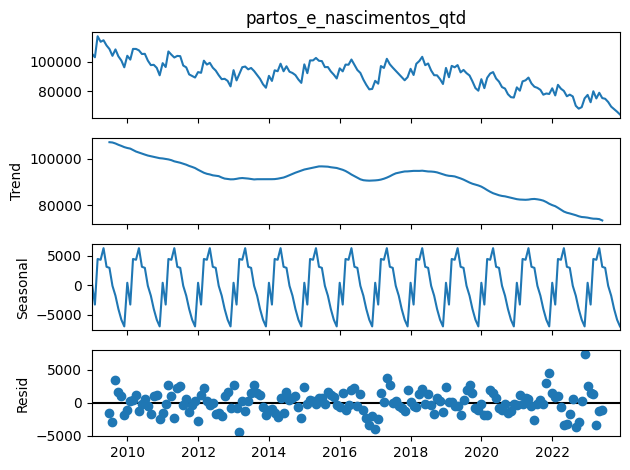

In [196]:
decomposition = seasonal_decompose(df_st['partos_e_nascimentos_qtd'], model='additive')
decomposition.plot()
plt.show()


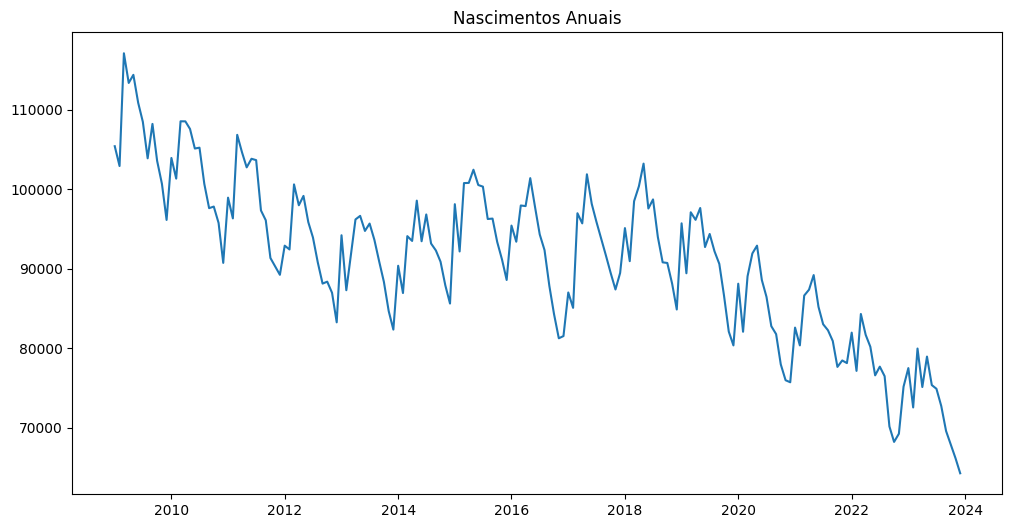

Teste ADF na série original:
ADF Statistic: -0.2014761075527554
p-value: 0.9383454404729215
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045
ADF Statistic: -0.2014761075527554
p-value: 0.9383454404729215
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045


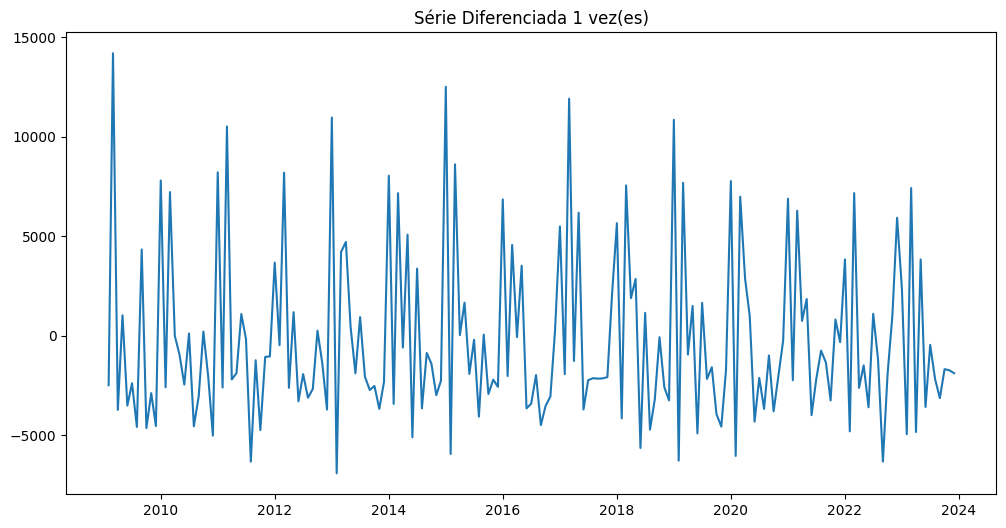

ADF Statistic: -2.8594051505178473
p-value: 0.05027637499920585
Critical Values:
   1%: -3.47086589632514
   5%: -2.879330279087651
   10%: -2.57625492712671


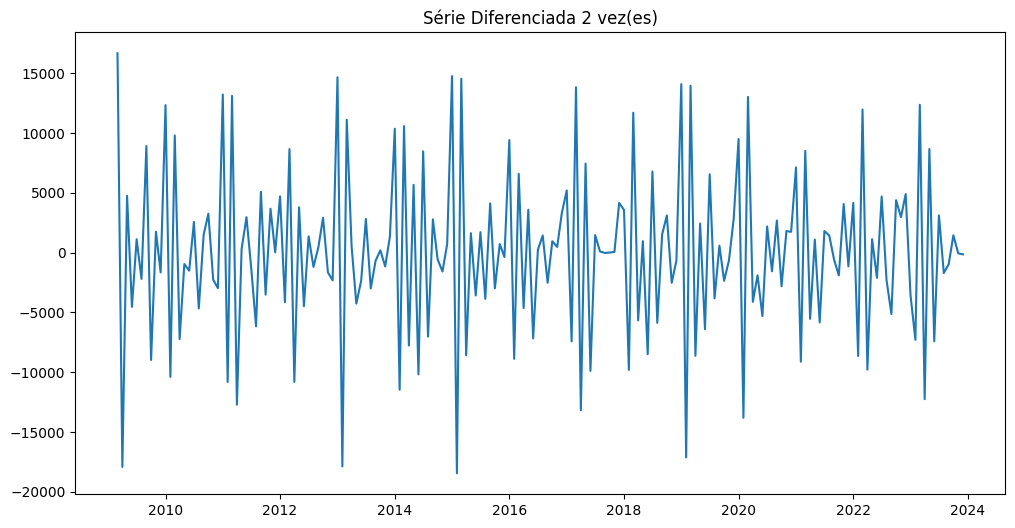

ADF Statistic: -10.240306074954002
p-value: 4.76872432374361e-18
Critical Values:
   1%: -3.470616369591229
   5%: -2.8792214018977655
   10%: -2.57619681359045
A série se tornou estacionária após 2 diferenciações.


In [219]:
from statsmodels.tsa.stattools import adfuller


# Função para testar estacionariedade com o teste ADF
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    return result[1] <= 0.05  # Retorna True se a série é estacionária (p-value <= 0.05)

# Plotar a série temporal original
plt.figure(figsize=(12, 6))
plt.plot(df_st.index, df_st['partos_e_nascimentos_qtd'])
plt.title('Nascimentos Anuais')
plt.show()

# Testar estacionariedade da série original
print('Teste ADF na série original:')
adf_test(df_st['partos_e_nascimentos_qtd'])

# Diferenciação até a série se tornar estacionária
d = 0
serie = df_st['partos_e_nascimentos_qtd']
while not adf_test(serie):
    d += 1
    serie = serie.diff().dropna()
    plt.figure(figsize=(12, 6))
    plt.plot(serie)
    plt.title(f'Série Diferenciada {d} vez(es)')
    plt.show()

print(f'A série se tornou estacionária após {d} diferenciações.')


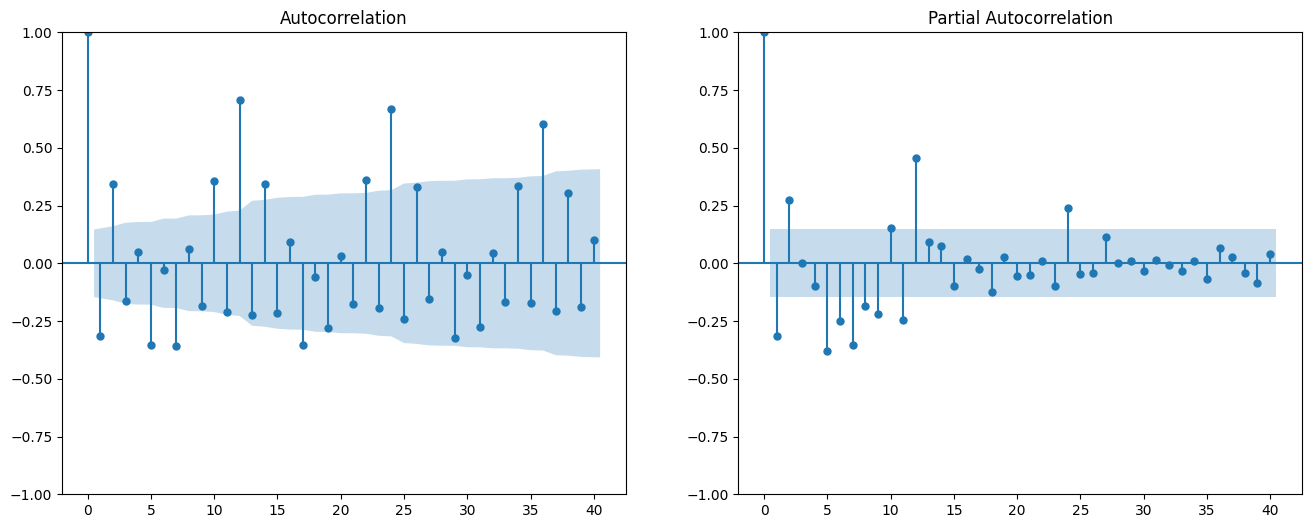

In [218]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotar ACF e PACF
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df_st['partos_e_nascimentos_qtd'].diff().dropna(), lags=40, ax=ax[0])
plot_pacf(df_st['partos_e_nascimentos_qtd'].diff().dropna(), lags=40, ax=ax[1])
plt.show()

In [220]:
import pmdarima as pm

# Usar auto_arima para encontrar os melhores valores de p, d e q
model = pm.auto_arima(df_st['partos_e_nascimentos_qtd'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3457.038, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3505.685, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3501.437, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3503.454, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3504.203, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3478.250, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3477.614, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3477.501, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3453.809, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3476.896, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3476.273, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3452.430, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3501.546, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : 

                                  SARIMAX Results                                   
Dep. Variable:     partos_e_nascimentos_qtd   No. Observations:                  180
Model:                       ARIMA(3, 2, 3)   Log Likelihood               -1751.330
Date:                      Tue, 11 Jun 2024   AIC                           3516.661
Time:                              23:34:02   BIC                           3538.933
Sample:                          01-01-2009   HQIC                          3525.693
                               - 12-01-2023                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5379      0.180     -2.985      0.003      -0.891      -0.185
ar.L2          0.6446      0.115      5.601      0.000       0.419       0.870
ar.L

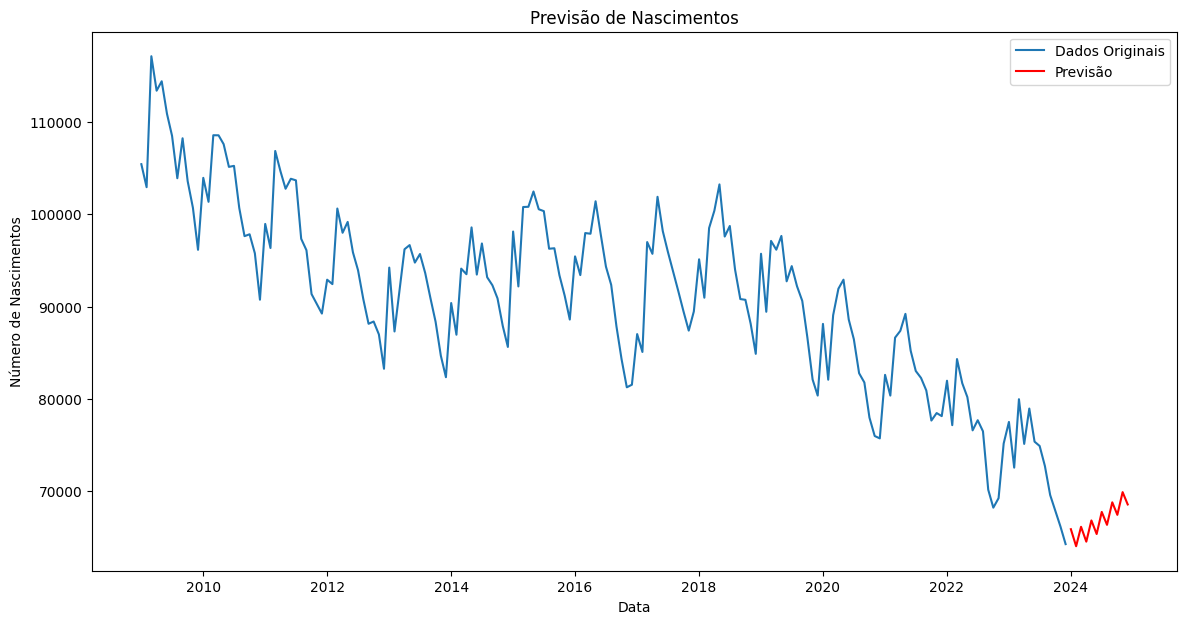

In [222]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_st['partos_e_nascimentos_qtd'], order=(3, 2, 3))
model_fit = model.fit()
print(model_fit.summary())

# Previsão
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(14, 7))
plt.plot(df_st.index, df_st['partos_e_nascimentos_qtd'], label='Dados Originais')
plt.plot(forecast.index, forecast, label='Previsão', color='red')
plt.title('Previsão de Nascimentos')
plt.xlabel('Data')
plt.ylabel('Número de Nascimentos')
plt.legend()
plt.show()


In [183]:
fig = px.line(df_st, y='partos_e_nascimentos_val',title='Números de partos entre 2009 e 2024')
# fig2 = px.line(df_st, y='partos_e_nascimentos_val',title='Valores com partos entre 2009 e 2024')
#fig = make_subplots(rows=2, cols=1, subplot_titles=('Quantidade', 'Valores'), shared_xaxes=True, shared_yaxes=False)

#fig.add_trace(go.Scatter(x=df_st.index, y=df_st['partos_e_nascimentos_qtd'], mode='lines', name='Quantidade'), row=1, col=1)
#fig.add_trace(go.Scatter(x=df_st.index, y=df_st['partos_e_nascimentos_val'], mode='lines', name='Valores'), row=2, col=1)

#fig.update_xaxes(dtick="M1", tickmode='auto', rangeslider_visible=True)
fig.update_layout(template = 'plotly_white')

# fig.update_layout(
#     xaxis2_rangeslider_visible=True,
#     xaxis2_type="date",
#     autosize=True, height=900
#     )
fig.show()